In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

In [3]:
# initialize SparkSession
spark = SparkSession.builder \
    .master("local") \
    .appName("AppName") \
    .getOrCreate()

In [4]:
# load the dataset
data = spark.read.csv("data.csv", header=True, sep=',',inferSchema="true")
data.show(vertical=True) #in verticale è peggio ma almeno evitiamo copy/paste su notepad

-RECORD 0-------------------------
 Id              | 7f96b2f878858a 
 groupId         | 4d4b580de459be 
 matchId         | a10357fd1a4a91 
 assists         | 0              
 boosts          | 0              
 damageDealt     | 0.0            
 DBNOs           | 0              
 headshotKills   | 0              
 heals           | 0              
 killPlace       | 60             
 killPoints      | 1241           
 kills           | 0              
 killStreaks     | 0              
 longestKill     | 0.0            
 matchDuration   | 1306           
 matchType       | squad-fpp      
 maxPlace        | 28             
 numGroups       | 26             
 rankPoints      | -1             
 revives         | 0              
 rideDistance    | 0.0            
 roadKills       | 0              
 swimDistance    | 0.0            
 teamKills       | 0              
 vehicleDestroys | 0              
 walkDistance    | 244.8          
 weaponsAcquired | 1              
 winPoints       | 1

In [5]:
data.dtypes

[('Id', 'string'),
 ('groupId', 'string'),
 ('matchId', 'string'),
 ('assists', 'int'),
 ('boosts', 'int'),
 ('damageDealt', 'double'),
 ('DBNOs', 'int'),
 ('headshotKills', 'int'),
 ('heals', 'int'),
 ('killPlace', 'int'),
 ('killPoints', 'int'),
 ('kills', 'int'),
 ('killStreaks', 'int'),
 ('longestKill', 'double'),
 ('matchDuration', 'int'),
 ('matchType', 'string'),
 ('maxPlace', 'int'),
 ('numGroups', 'int'),
 ('rankPoints', 'int'),
 ('revives', 'int'),
 ('rideDistance', 'double'),
 ('roadKills', 'int'),
 ('swimDistance', 'double'),
 ('teamKills', 'int'),
 ('vehicleDestroys', 'int'),
 ('walkDistance', 'double'),
 ('weaponsAcquired', 'int'),
 ('winPoints', 'int'),
 ('winPlacePerc', 'double')]

In [6]:
data.describe().show(vertical=True)

-RECORD 0-------------------------------
 summary         | count                
 Id              | 4446966              
 groupId         | 4446966              
 matchId         | 4446966              
 assists         | 4446966              
 boosts          | 4446966              
 damageDealt     | 4446966              
 DBNOs           | 4446966              
 headshotKills   | 4446966              
 heals           | 4446966              
 killPlace       | 4446966              
 killPoints      | 4446966              
 kills           | 4446966              
 killStreaks     | 4446966              
 longestKill     | 4446966              
 matchDuration   | 4446966              
 matchType       | 4446966              
 maxPlace        | 4446966              
 numGroups       | 4446966              
 rankPoints      | 4446966              
 revives         | 4446966              
 rideDistance    | 4446966              
 roadKills       | 4446966              
 swimDistance   

In [7]:
data.createOrReplaceTempView("pubg")

#### Numbers of unique id/groupId/matchId

In [8]:
spark.sql("""SELECT count(Id) FROM pubg""").show()
spark.sql("""SELECT count(distinct groupId) FROM pubg""").show()
spark.sql("""SELECT count(distinct matchId) FROM pubg""").show()

+---------+
|count(Id)|
+---------+
|  4446966|
+---------+

+-----------------------+
|count(DISTINCT groupId)|
+-----------------------+
|                2026745|
+-----------------------+

+-----------------------+
|count(DISTINCT matchId)|
+-----------------------+
|                  47965|
+-----------------------+



#### Match Type (by single id)

In [9]:
rdd = spark.sql("""SELECT matchtype, count(distinct Id) FROM pubg GROUP BY matchtype""").\
                                                                rdd.map(lambda x: (x[0],x[1])).\
                                                                filter(lambda x: x[1]>10000).\
                                                                collect()  

In [10]:
df = pd.DataFrame(rdd,columns=['matchtype','freq'])

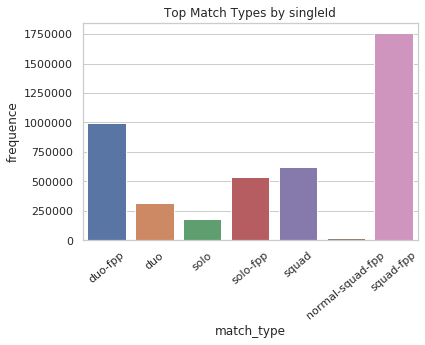

In [11]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="matchtype", y = 'freq', data = df)
ax.set(xlabel='match_type', ylabel='frequence')
ax.tick_params(axis='x', rotation=40)
plt.title("Top Match Types by singleId")
plt.show()

#### Match Type by Group Id

In [12]:
rdd = spark.sql("""SELECT matchtype, count(distinct groupId) FROM pubg GROUP BY matchtype""").\
                                                                rdd.map(lambda x: (x[0],x[1])).\
                                                                filter(lambda x: x[1]>10000).\
                                                                collect()  

In [13]:
df = pd.DataFrame(rdd,columns=['matchtype','freq'])

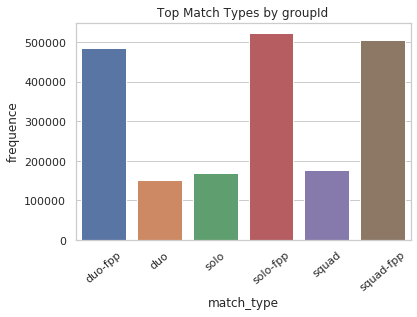

In [14]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="matchtype", y = 'freq', data = df)
ax.set(xlabel='match_type', ylabel='frequence')
ax.tick_params(axis='x', rotation=40)
plt.title("Top Match Types by groupId")
plt.show()

#### Assists

In [15]:
data.select('assists').summary().show()

+-------+-------------------+
|summary|            assists|
+-------+-------------------+
|  count|            4446966|
|   mean|0.23381492010507837|
| stddev| 0.5885730871999953|
|    min|                  0|
|    25%|                  0|
|    50%|                  0|
|    75%|                  0|
|    max|                 22|
+-------+-------------------+



In [16]:
rdd = spark.sql("""SELECT assists, matchtype, count(Id) FROM pubg GROUP BY assists, matchtype""").\
                                rdd.map(lambda x: (x[0],x[1],x[2])).\
                                filter(lambda x: x[2]>10000).\
                                collect()

In [19]:
df = pd.DataFrame(rdd,columns=['assists','matchtype','freq']).sort_values(by=['assists']).reset_index(drop=True)
df

,assists,matchtype,freq
0,0,solo-fpp,507294
1,0,duo,261087
2,0,squad-fpp,1383128
3,0,squad,494558
4,0,solo,172452
5,0,duo-fpp,827138
6,1,duo,41278
7,1,duo-fpp,134174
8,1,squad-fpp,276954
9,1,squad,96218


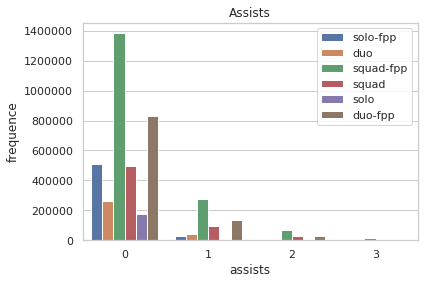

In [20]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="assists", y = 'freq', data = df, hue='matchtype')
ax.set(xlabel='assists', ylabel='frequence')
plt.title("Assists")
plt.legend(loc='upper right')
plt.show()

In [229]:
df = df.groupby(['assists'])[['freq']].sum().reset_index("assists")

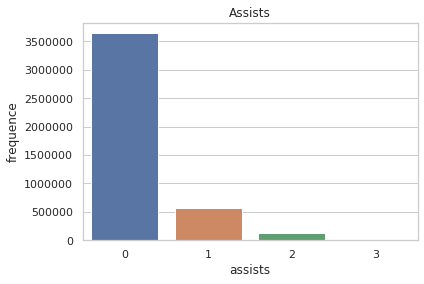

In [230]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="assists", y = 'freq', data = df)
ax.set(xlabel='assists', ylabel='frequence')
plt.title("Assists")
plt.show()

#### Boosts

In [231]:
data.select('boosts').summary().show()

+-------+------------------+
|summary|            boosts|
+-------+------------------+
|  count|           4446966|
|   mean|1.1069077209045448|
| stddev|1.7157936773815516|
|    min|                 0|
|    25%|                 0|
|    50%|                 0|
|    75%|                 2|
|    max|                33|
+-------+------------------+



In [232]:
rdd = spark.sql("""SELECT boosts,matchtype, count(Id) FROM pubg GROUP BY boosts,matchtype""").\
                                rdd.map(lambda x: (x[0],x[1],x[2])).\
                                filter(lambda x: x[0]<=5 and x[2]>10000).\
                                collect()

In [233]:
df = pd.DataFrame(rdd,columns=['boosts','matchtype','freq']).sort_values(by=['boosts']).reset_index(drop=True)

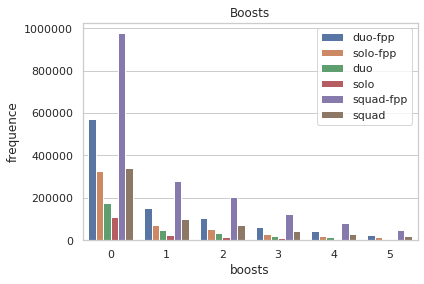

In [234]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="boosts", y = 'freq', data = df, hue='matchtype')
ax.set(xlabel='boosts', ylabel='frequence')
plt.title("Boosts")
plt.legend(loc='upper right')
plt.show()

In [235]:
df = df.groupby(['boosts'])[['freq']].sum().reset_index("boosts")

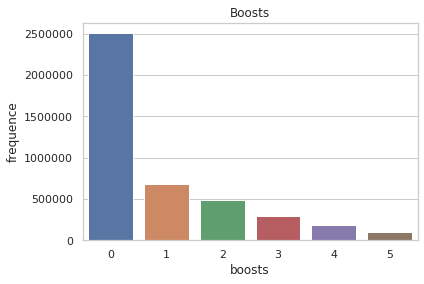

In [236]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="boosts", y = 'freq', data = df)
ax.set(xlabel='boosts', ylabel='frequence')
plt.title("Boosts")
plt.show()

#### DamageDealt

In [21]:
data.select('damageDealt').summary().show()

+-------+------------------+
|summary|       damageDealt|
+-------+------------------+
|  count|           4446966|
|   mean|130.71713789840132|
| stddev|170.78062066696396|
|    min|               0.0|
|    25%|               0.0|
|    50%|             84.24|
|    75%|             186.0|
|    max|            6616.0|
+-------+------------------+



In [26]:
rdd = spark.sql("""SELECT damageDealt FROM pubg""").\
                                rdd.map(lambda x: x[0]).\
                                filter(lambda x: x<1000)
        

In [30]:
l = rdd.histogram(10)

In [40]:
df = pd.DataFrame(list(zip(*l)), columns=['damageDealt', 'frequency'])


In [41]:
df

,damageDealt,frequency
0,0.00,2402040
1,99.99,1021428
2,199.98,477195
3,299.97,238697
4,399.96,128362
5,499.95,72812
6,599.94,41860
7,699.93,24972
8,799.92,14898
9,899.91,8871


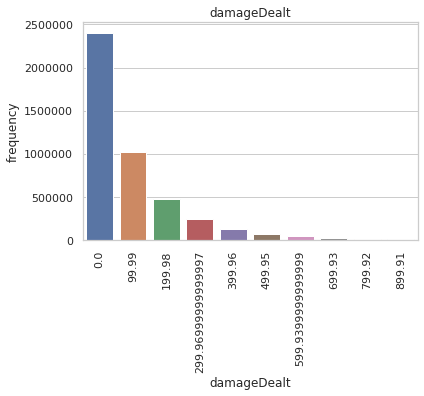

In [44]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="damageDealt", y = 'frequency', data = df)
ax.set(xlabel='damageDealt', ylabel='frequency')
ax.tick_params(axis='x', rotation=90)
plt.title("damageDealt")
plt.show()

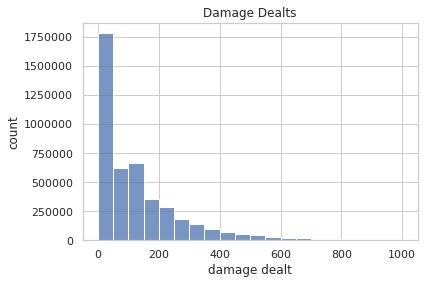

In [239]:
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=rdd, binwidth=50)
ax.set(xlabel='damage dealt',ylabel='count')
plt.title("Damage Dealts")
plt.show()

In [240]:
rdd = spark.sql("""SELECT damageDealt,winPlacePerc FROM pubg""").\
                                rdd.map(lambda x: (x[0],x[1])).\
                                collect()
arr = list(zip(*rdd))
dat = {'damageDealt':arr[0],'winPlacePerc':arr[1]}
df = pd.DataFrame(dat,columns=['damageDealt','winPlacePerc'])

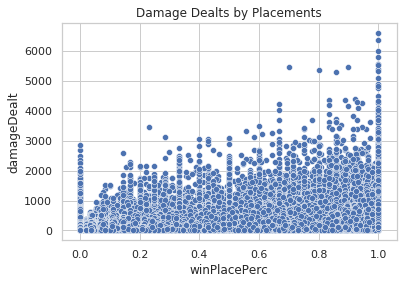

In [243]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x="winPlacePerc", y="damageDealt", data=df)
ax.set(xlabel='winPlacePerc',ylabel='damage dealt')
plt.title("Damage Dealts by Placements")
plt.show()

#### Kills

In [250]:
data.select('kills').summary().show()

+-------+------------------+
|summary|             kills|
+-------+------------------+
|  count|           4446966|
|   mean|0.9247833241810259|
| stddev| 1.558444653227703|
|    min|                 0|
|    25%|                 0|
|    50%|                 0|
|    75%|                 1|
|    max|                72|
+-------+------------------+



In [268]:
rdd = spark.sql("""SELECT kills, matchtype, count(Id) FROM pubg GROUP BY kills, matchtype""").\
                            rdd.map(lambda x: (x[0],x[1],x[2])).\
                            filter(lambda x: x[2]>20000).\
                            collect()

In [269]:
# credo un dataframe in locale
df = pd.DataFrame(rdd,columns=['kills','matchtype','freq']).sort_values(by=['kills']).reset_index(drop=True)

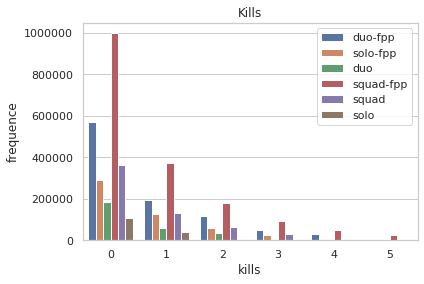

In [270]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="kills", y = 'freq', data = df,hue='matchtype')
ax.set(xlabel='kills', ylabel='frequence')
plt.title("Kills")
plt.legend(loc='upper right')
plt.show()

In [261]:
df = df.groupby(['kills'])[['freq']].sum().reset_index()


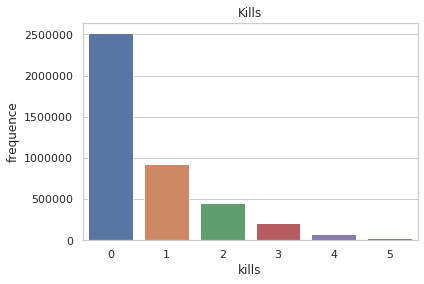

In [263]:
# display
sns.set_theme(style="whitegrid")
ax = sns.barplot(x ="kills", y = 'freq', data = df)
ax.set(xlabel='kills', ylabel='frequence')
plt.title("Kills")
plt.show()

In [271]:
rdd = spark.sql("""SELECT kills,winPlacePerc FROM pubg""").\
                                rdd.map(lambda x: (x[0],x[1])).\
                                collect()
arr = list(zip(*rdd))
dat = {'kills':arr[0],'winPlacePerc':arr[1]}
df = pd.DataFrame(dat,columns=['kills','winPlacePerc'])

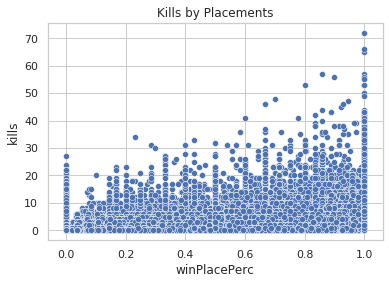

In [273]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x="winPlacePerc", y="kills", data=df)
ax.set(xlabel='winPlacePerc',ylabel='kills')
plt.title("Kills by Placements")
plt.show()